# Pivot Tables with Pandas: San Francisco Crime Data

## Data background

The San Francisco crime data comes from the city Socrata portal:

https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry

The API call to get the data as CSV, for dates between '2006-01-01' and '2016-04-01':

https://data.sfgov.org/resource/cuks-n6tp.csv?$where=date between '2006-01-01' and '2016-04-01'&$select=incidntnum,category,descript,date,time,pddistrict,resolution,address,x,y,pdid&$limit=1000000000

The download is more than 200 MB+. A mirror of the data is included in this repo:

[data/sf/raw/bulk-data.sfgov.org--20060101-20160401--cuks-n6tp.csv](data/sf/raw/bulk-data.sfgov.org--20060101-20160401--cuks-n6tp.csv)

An important [caveat from the SF data portal](https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry):

> ***As of July 19, 2015, the PD District boundaries have been updated through a redistricting process. These new boundaries are not reflected in the dataset yet so you cannot compare data from July 19, 2015 onward to official reports from PD with the Police District column. We are working on an update to the dataset to reflect the updated boundaries starting with data entered July 19 onward.***
Incidents derived from SFPD Crime Incident Reporting system Updated daily, showing data from 1/1/2003 up until two weeks ago from current date. Please note: San Francisco police have implemented a new system for tracking crime. The dataset included here is still coming from the old system, which is in the process of being retired (a multi-year process). Data included here is no longer the official SFPD data. We will migrate to the new system for DataSF in the upcoming months.




In [101]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
DATA_PATH = Path('data', 'sf', 'raw', 'bulk-data.sfgov.org--20060101-20160401--cuks-n6tp.csv')

In [102]:
df = pd.read_csv(DATA_PATH, parse_dates=['date'])
df['year'] = df['date'].dt.year
# filter out 2016 since it's not a full year
df = df[df['year'] < 2016]

In [103]:
# total number of rows
len(df)

1422525

In [104]:
df.head()

,address,category,date,descript,incidntnum,pddistrict,pdid,resolution,time,x,y,year
0,5TH ST / BRYANT ST,WARRANTS,2015-07-11,ENROUTE TO OUTSIDE JURISDICTION,150602980,SOUTHERN,15060298062050,"ARREST, BOOKED",07:45,-122.400302,37.777799,2015
1,5TH ST / BRYANT ST,WARRANTS,2015-07-11,WARRANT ARREST,150602980,SOUTHERN,15060298063010,"ARREST, BOOKED",07:45,-122.400302,37.777799,2015
12,3300 Block of 20TH ST,"SEX OFFENSES, FORCIBLE",2009-12-31,"FORCIBLE RAPE, ARMED WITH A GUN",100000027,MISSION,10000002702001,"ARREST, BOOKED",23:55,-122.416331,37.758852,2009
13,400 Block of VALENCIA ST,OTHER OFFENSES,2015-11-27,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,160298165,MISSION,16029816509029,NONE,00:01,-122.422073,37.766126,2015
17,100 Block of OTIS ST,NON-CRIMINAL,2015-07-15,LOST PROPERTY,160304308,SOUTHERN,16030430871000,NONE,12:00,-122.420303,37.770897,2015


# Simple pivot chart

http://pbpython.com/pandas-pivot-table-explained.html

Let's do a simple pivot: for every year, aggregate the count of records.


In [105]:
crimeagg = df.pivot_table(index='year', aggfunc=len, values='pdid')
# the result
crimeagg

year
2006    137853
2007    137639
2008    141311
2009    139860
2010    133525
2011    132699
2012    140858
2013    152811
2014    150159
2015    155810
Name: pdid, dtype: int64

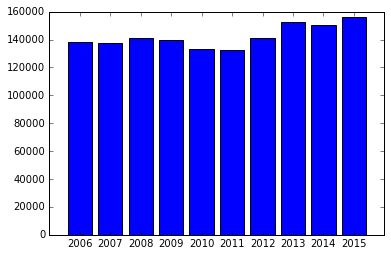

In [106]:
# let's chart it
fig, ax = plt.subplots()
ax.bar(crimeagg.index, crimeagg.values, align='center')
ax.set_xticks(range(2006, 2016))
ax.set_xlim(xmin=2005);

# Pivot by category

A general count of crime is not interesting. Lets dive down into categories

Pivot the dataframe by category, and then by year


In [107]:
catdf = df.pivot_table(index='category', columns='year', values='pdid', aggfunc=len)

In [108]:
catdf.head()

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
category,,,,,,,,,,
ARSON,240,246,248,222,209,203,237,248,253,311
ASSAULT,12449,12518,12681,12284,12388,12281,12181,12583,12408,13071
BAD CHECKS,87,69,78,64,54,45,49,26,34,37
BRIBERY,36,56,49,46,61,47,64,69,56,72
BURGLARY,7004,5454,5679,5379,4966,4987,6244,6195,6070,5925


In [109]:
catdf['delta_2015_2010'] = (catdf[2015] - catdf[2010]) / catdf[2010]
catdf.sort_values('delta_2015_2010')

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2015_2010
category,,,,,,,,,,,
LOITERING,96,430,441,126,187,124,135,54,36,27,-0.855615
PROSTITUTION,1290,1873,1673,1468,1299,1094,690,692,449,371,-0.714396
DRUG/NARCOTIC,9069,10560,11648,11950,9205,6935,6445,6775,5409,4249,-0.538403
TREA,NaN,NaN,NaN,NaN,2,NaN,2,4,1,1,-0.500000
LIQUOR LAWS,248,401,499,394,324,261,226,227,180,163,-0.496914
RUNAWAY,382,273,259,340,293,320,330,214,221,149,-0.491468
"SEX OFFENSES, NON FORCIBLE",29,39,20,17,30,29,28,18,20,19,-0.366667
DISORDERLY CONDUCT,521,581,789,956,827,762,704,464,345,548,-0.337364
EXTORTION,49,41,52,92,58,41,38,30,32,39,-0.327586


In [110]:
# filter the list to types of crime that have had more than a 1000 reported incidents
# total for 2010 and 2015
majorcatdf = catdf[catdf[2015] + catdf[2010] > 1000]
majorcatdf.sort_values('delta_2015_2010')

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2015_2010
category,,,,,,,,,,,
PROSTITUTION,1290,1873,1673,1468,1299,1094,690,692,449,371,-0.714396
DRUG/NARCOTIC,9069,10560,11648,11950,9205,6935,6445,6775,5409,4249,-0.538403
DISORDERLY CONDUCT,521,581,789,956,827,762,704,464,345,548,-0.337364
FORGERY/COUNTERFEITING,2306,2592,2468,2209,1089,820,990,913,750,744,-0.316804
DRUNKENNESS,703,671,710,804,706,652,644,954,620,576,-0.184136
SUSPICIOUS OCC,4775,4800,4751,4627,6004,6207,5860,5677,5230,5453,-0.091772
OTHER OFFENSES,18306,19763,23457,24693,20990,19552,18648,19481,20743,20240,-0.035731
VANDALISM,7688,7566,7342,7604,7934,7243,7808,6921,7167,7667,-0.033653
MISSING PERSON,4253,4024,4335,3657,4513,4758,4373,4485,4735,4609,0.021272


# Larceny/Thefts

Go back to the original table, now facet by descript



In [111]:
thefts_df = df[df['category'] == 'LARCENY/THEFT']
thefts_pivot = thefts_df.pivot_table(index='descript', columns='year', values='pdid', aggfunc=len)

In [112]:
thefts_pivot['delta_2015_2010'] = (thefts_pivot[2015] - thefts_pivot[2010]) / thefts_pivot[2010] 

In [113]:
thefts_pivot.sort_values('delta_2015_2010').head()

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2015_2010
descript,,,,,,,,,,,
PETTY THEFT WITH PRIOR,865,765,831,756,634,428,403,453,370,8,-0.987382
GRAND THEFT COIN OPERATED MACHINE,6,5,6,12,13,10,3,2,2,1,-0.923077
ATTEMPTED THEFT COIN OPERATED MACHINE,8,1,NaN,4,10,4,1,3,1,2,-0.800000
GRAND THEFT AUTO STRIP,108,78,169,97,87,100,76,30,47,20,-0.770115
"THEFT, GRAND, BY FIDUCIARY, >$400 IN 12 MONTHS",1,1,NaN,1,7,9,1,3,5,2,-0.714286


In [114]:
# remove noise
majorthefts_pivot = thefts_pivot[thefts_pivot[2015] + thefts_pivot[2010] > 100]
majorthefts_pivot.sort_values('delta_2015_2010')

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2015_2010
descript,,,,,,,,,,,
PETTY THEFT WITH PRIOR,865,765,831,756,634,428,403,453,370,8,-0.987382
GRAND THEFT AUTO STRIP,108,78,169,97,87,100,76,30,47,20,-0.770115
PETTY THEFT AUTO STRIP,56,56,127,164,99,77,148,46,46,34,-0.656566
GRAND THEFT PURSESNATCH,178,145,149,107,129,74,57,59,64,56,-0.565891
"LOST PROPERTY, GRAND THEFT",112,131,144,107,72,89,77,60,86,51,-0.291667
GRAND THEFT FROM A BUILDING,1472,1417,1611,1639,1695,1994,1528,1220,1131,1221,-0.279646
GRAND THEFT OF PROPERTY,1476,1781,2189,2554,2747,1766,2001,1950,1975,2071,-0.246087
THEFT OF CHECKS OR CREDIT CARDS,NaN,1,2,3,115,126,94,111,77,89,-0.226087
THEFT FROM MERCHANT OR LIBRARY,NaN,NaN,NaN,1,113,151,205,155,134,90,-0.203540


# Vehicle thefts

http://www.sfgate.com/crime/article/Car-thefts-surging-in-San-Francisco-6516607.php

In [115]:
autothefts_df = df[df['category'] == 'VEHICLE THEFT']
autothefts_piv = autothefts_df.pivot_table(index='descript', columns='year', values='pdid', aggfunc=len)
autothefts_piv['delta_2015_2010'] = (autothefts_piv[2015] - autothefts_piv[2010]) / autothefts_piv[2010]
major_autothefts_piv = autothefts_piv[autothefts_piv[2015] + autothefts_piv[2010] > 100]

In [116]:
major_autothefts_piv.sort_values('delta_2015_2010')

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2015_2010
descript,,,,,,,,,,,
ATTEMPTED STOLEN VEHICLE,91,72,73,62,55,50,50,45,54,68,0.236364
STOLEN AUTOMOBILE,4881,4291,3953,3494,2817,3294,4289,3935,4567,4985,0.769613
STOLEN AND RECOVERED VEHICLE,384,348,340,269,264,261,309,350,415,472,0.787879
STOLEN TRUCK,1540,1393,1355,1029,867,858,1136,1423,1472,1578,0.820069
STOLEN MOTORCYCLE,343,318,290,291,296,259,342,410,550,785,1.652027


# By district

In [117]:
v_df = df[df['category'] == 'VEHICLE THEFT']
v_piv = v_df.pivot_table(index='pddistrict', columns='year', values='pdid', aggfunc=len)
v_piv['delta_2014_2010'] = (v_piv[2014] - v_piv[2010]) / v_piv[2010]


In [118]:
v_piv.sort_values('delta_2014_2010', ascending=False)

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,delta_2014_2010
pddistrict,,,,,,,,,,,
CENTRAL,583,637,489,434,303,403,490,441,556,550,0.834983
NORTHERN,836,702,765,610,462,562,707,760,809,944,0.751082
MISSION,994,830,881,766,572,675,850,812,993,1199,0.736014
INGLESIDE,1223,966,840,865,830,754,1308,1286,1432,1368,0.725301
PARK,542,429,440,365,303,383,525,377,518,640,0.709571
RICHMOND,500,603,464,316,282,339,488,518,440,561,0.560284
SOUTHERN,646,621,594,538,372,418,494,452,574,794,0.543011
TARAVAL,927,787,674,523,470,463,505,643,701,788,0.491489
BAYVIEW,907,785,804,684,657,679,755,836,952,983,0.449011
